# Mini Project 2: Keras CNN test

This notebook will be investigating the use of CNNs on MNIST data, as a more accessible way of getting into using CNNs for our edge detection.

In [1]:
# Imports.
import os
import tensorflow as tf
import keras
from tensorflow.keras import utils as np_utils
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras import backend as K 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the MNIST data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Pre-processing the data so it
# fits in the Keras model properly.
img_rows, img_cols = 28, 28 

if K.image_data_format() == 'channels_first': 
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
    input_shape = (1, img_rows, img_cols) 
else: 
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
    input_shape = (img_rows, img_cols, 1) 

# Normalising the greyscale values.
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255 
x_test /= 255 

# Changing the y data to multi-class
# vectors.
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

In [4]:
# Now building the model.
model = Sequential()
# Padding = 'same' means that the edges
# of the image are not clipped.
conv_layer_1 = Conv2D(32, kernel_size = (3, 3),  
    activation = 'relu', input_shape = input_shape, name = 'conv_layer_1', padding = 'same')
model.add(conv_layer_1)
conv_layer_2 = Conv2D(64, kernel_size = (3, 3), activation = 'relu', name = 'conv_layer_2', padding = 'same')
model.add(conv_layer_2)
# Pooling with size (2,2) taking 2 strides at a time
# will half the size of the images.
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
# Dropout will randomly set node weights to 0
# (thus preventing training) by the given rate.
# This is to prevent overfitting of the data.
model.add(Dropout(rate = 0.25))
# Flatten will take the input and flatten
# its shape.
model.add(Flatten()) 
model.add(Dense(128, activation = 'relu')) 
model.add(Dropout(rate = 0.5)) 
model.add(Dense(10, activation = 'softmax'))

In [5]:
model.compile(loss = keras.losses.categorical_crossentropy, 
   optimizer = tf.keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [6]:
print(np.shape(conv_layer_1.get_weights()[0]))

(3, 3, 1, 32)


Sample weight before: 
[[ 0.09806007 -0.0692459   0.01823038]
 [-0.10621995  0.00975685  0.01605155]
 [-0.09132771  0.10464835  0.0912029 ]]


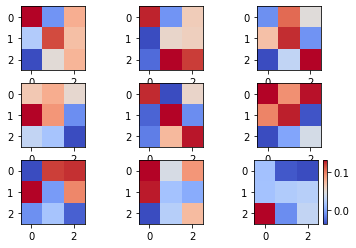

In [7]:
cl1w = conv_layer_1.get_weights()[0][:,:,0,:]
print("Sample weight before: \n{}".format(cl1w[:,:,1]))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(cl1w[:,:,i-1], cmap = "coolwarm")
plt.colorbar()
plt.show()

In [8]:
model.fit(
    x_train, y_train, 
    batch_size = 128,
    epochs = 12, 
    verbose = 1, 
    validation_data = (x_test, y_test)
)

Epoch 1/12
469/469 [==============================] - 49s 102ms/step - loss: 2.2824 - accuracy: 0.1636 - val_loss: 2.2501 - val_accuracy: 0.3617
Epoch 2/12
469/469 [==============================] - 48s 103ms/step - loss: 2.2251 - accuracy: 0.2895 - val_loss: 2.1750 - val_accuracy: 0.4410
Epoch 3/12
469/469 [==============================] - 47s 101ms/step - loss: 2.1440 - accuracy: 0.3908 - val_loss: 2.0702 - val_accuracy: 0.5555
Epoch 4/12
469/469 [==============================] - 46s 99ms/step - loss: 2.0317 - accuracy: 0.4683 - val_loss: 1.9245 - val_accuracy: 0.6515
Epoch 5/12
469/469 [==============================] - 47s 99ms/step - loss: 1.8797 - accuracy: 0.5364 - val_loss: 1.7311 - val_accuracy: 0.7116
Epoch 6/12
469/469 [==============================] - 47s 101ms/step - loss: 1.6921 - accuracy: 0.5898 - val_loss: 1.4998 - val_accuracy: 0.7564
Epoch 7/12
469/469 [==============================] - 48s 102ms/step - loss: 1.4943 - accuracy: 0.6269 - val_loss: 1.2697 - val_accu

Sample weight after: 
[[ 0.09761338 -0.06877422  0.01940376]
 [-0.10652761  0.01243353  0.02035619]
 [-0.09125256  0.10749115  0.09480785]]


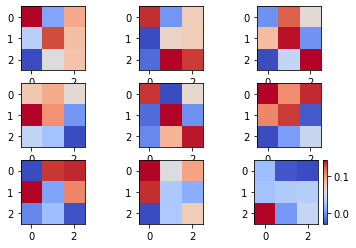

In [9]:
cl1w = conv_layer_1.get_weights()[0][:,:,0,:]
print("Sample weight after: \n{}".format(cl1w[:,:,1]))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(cl1w[:,:,i-1], cmap = "coolwarm")
plt.colorbar()
plt.show()

The network trains rather slowly. We will now try and utilise custom filters/kernels to see if this makes a difference like in mini project 1!

To do this, we need to look at the shape of the weights.

In [10]:
for layer in model.layers:
    if layer.name[0:4] == 'conv':
        print(np.shape(layer.get_weights()),np.shape(layer.get_weights()[0]), np.shape(layer.get_weights()[1]))

(2,) (3, 3, 1, 32) (32,)
(2,) (3, 3, 32, 64) (64,)


D:\teren\AppData\Local\Programs\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Looking at the shape of the first element of the layer weights, the first two elements correspond to the values of the kernel associated with each image node. The third element corresponds to which image in one of the nodes in the previous layer that the filter applies to, and the fourth gives the node in the current layer that contains the output of the convolution.

We can design very simple filters for the first layer, and then assign them to the weights using set_weights() methods.

In [11]:
# We can create custom weights in much the same
# way as before. This time, we distinguish nodes
# as producing images. This example is made for
# the first hidden layer.
n_images_prev = 1
n_images_now = 32
kernel_size_x = 3
kernel_size_y = 3

empty_weights = np.zeros(shape = n_images_prev*n_images_now*kernel_size_x*kernel_size_y, dtype = 'object').reshape((kernel_size_x,kernel_size_y,n_images_prev,n_images_now))
empty_biases = np.zeros(shape = n_images_now, dtype = 'object')

for image_index_prev in range(0,n_images_prev):
    for image_index_now in range(0,n_images_now):
        # We would open a kernel image here and load
        # the pixels.
        for index_x in range(0,kernel_size_x):
            for index_y in range(0,kernel_size_y):
                empty_weights[index_x,index_y,image_index_prev,image_index_now] = 1
        empty_biases[image_index_now] = 2
        
layer_weights = []
layer_weights.append(empty_weights)
layer_weights.append(empty_biases)
# Now checking if we have the right shapes.
print(np.shape(layer_weights), np.shape(empty_weights), np.shape(empty_biases))

(2,) (3, 3, 1, 32) (32,)


In [12]:
# Now we can add these filters and biases
# directly to our convolution layer.
print('BEFORE SET WEIGHTS: \n{}'.format(conv_layer_1.get_weights()))
print(conv_layer_1.get_weights())
conv_layer_1.set_weights(weights = layer_weights)
print('AFTER SET WEIGHTS: \n{}'.format(conv_layer_1.get_weights()))
print()

BEFORE SET WEIGHTS: 
[array([[[[ 1.60962686e-01,  9.76133794e-02, -9.01307091e-02,
           7.75637999e-02,  1.09995931e-01,  1.34338379e-01,
          -7.65385404e-02,  1.69821322e-01,  2.18287278e-02,
          -7.43810311e-02, -3.82304415e-02,  3.73920761e-02,
          -9.70473289e-02,  4.79668118e-02,  5.24997376e-02,
           1.23482704e-01, -1.07252158e-01, -1.39921650e-01,
           1.30365696e-02,  6.67620078e-02,  6.62403107e-02,
          -1.93687249e-02,  2.80563235e-02, -8.81657004e-02,
           7.64054433e-02,  5.28538488e-02,  1.16980694e-01,
           1.40203252e-01, -1.01672091e-01, -1.25174686e-01,
           1.50168911e-01, -1.55355539e-02]],

        [[-4.67361175e-02, -6.87742159e-02,  3.76479290e-02,
           9.49041024e-02, -9.00475904e-02,  7.86235183e-02,
           1.63948074e-01,  4.98540550e-02, -2.51422226e-02,
           1.68349937e-01, -1.04371153e-01, -1.07391059e-01,
          -8.86535347e-02,  1.33531436e-01,  2.38896161e-02,
          -8.455

Wonderful! Now we can use our custom filters in the Keras API. Granted, if we know what filters we should use then it would be less computation time to just apply those filters first and then train-test on the resulting filtered images. However, just in case the filters need to change slightly, and in case we miss any, it is safer to just allow them to be trained through the Keras network, with excess random nodes being assigned to wild-card nodes. If we are confident with said filters, then we can take them and apply them to our images separately if we can assure that it will be less computation time to do so.

The filters are generated in the "Generating initial filters.ipynb" file. Now, let us set up a similar custom network to see how they perform.

In [13]:
# Now building the custom model.
model_cust = Sequential()
# Padding = 'same' means that the edges
# of the image are not clipped.
cust_conv_layer_1 = Conv2D(32, kernel_size = (3, 3),  
    activation = 'relu', input_shape = input_shape, name = 'cust_conv_layer_1', padding = 'same')
model_cust.add(cust_conv_layer_1)
cust_conv_layer_2 = Conv2D(64, kernel_size = (3, 3), activation = 'relu', name = 'cust_conv_layer_2', padding = 'same')
model_cust.add(cust_conv_layer_2)
# Pooling with size (2,2) taking 2 strides at a time
# will half the size of the images.
model_cust.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
# Dropout will randomly set node weights to 0
# (thus preventing training) by the given rate.
# This is to prevent overfitting of the data.
model_cust.add(Dropout(rate = 0.25))
# Flatten will take the input and flatten
# its shape.
model_cust.add(Flatten()) 
model_cust.add(Dense(128, activation = 'relu')) 
model_cust.add(Dropout(rate = 0.5)) 
model_cust.add(Dense(10, activation = 'softmax'))

In [14]:
model_cust.compile(loss = keras.losses.categorical_crossentropy, 
   optimizer = tf.keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [15]:
# We can create custom weights in much the same
# way as before. This time, we distinguish nodes
# as producing images. This example is made for
# the first hidden layer.
file_path = os.getcwd()
file_path += '\\Initial Filters\\test_1 - Copy'
n_images_prev = 1
n_images_now = 32
kernel_size_x = 3
kernel_size_y = 3

empty_weights = np.zeros(shape = n_images_prev*n_images_now*kernel_size_x*kernel_size_y, dtype = 'object').reshape((kernel_size_x,kernel_size_y,n_images_prev,n_images_now))
empty_biases = np.zeros(shape = n_images_now, dtype = 'object')

for image_index_prev in range(0,n_images_prev):
    for image_index_now in range(0,n_images_now):
        # We open a kernel file here.
        try:
            weight_array = np.genfromtxt(file_path + "\\filter_{}".format(image_index_now))
            empty_weights[:,:,image_index_prev,image_index_now] = weight_array.reshape((kernel_size_x,kernel_size_y)).transpose()
        # If the file is not found, then just use a random kernel.
        except OSError:
            empty_weights[:,:,image_index_prev,image_index_now] = np.random.rand(kernel_size_x,kernel_size_y)
        empty_biases[image_index_now] = 0
        
layer_weights = []
layer_weights.append(empty_weights)
layer_weights.append(empty_biases)
cust_conv_layer_1.set_weights(weights = layer_weights)


Sample weight before: 
[[-1.e+00  1.e+00  1.e-06]
 [-1.e+00  1.e+00  1.e-06]
 [-1.e+00  1.e+00  1.e-06]]


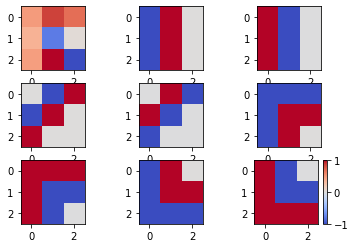

In [16]:
ccl1w = cust_conv_layer_1.get_weights()[0][:,:,0,:]
print("Sample weight before: \n{}".format(ccl1w[:,:,1]))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(ccl1w[:,:,i-1], cmap = "coolwarm")
plt.colorbar()
plt.show()

In [17]:
model_cust.fit(
    x_train, y_train, 
    batch_size = 128,
    epochs = 12, 
    verbose = 1, 
    validation_data = (x_test, y_test)
)

Epoch 1/12
469/469 [==============================] - 46s 99ms/step - loss: 2.1669 - accuracy: 0.2322 - val_loss: 1.5756 - val_accuracy: 0.6642
Epoch 2/12
469/469 [==============================] - 46s 98ms/step - loss: 1.6457 - accuracy: 0.4460 - val_loss: 1.1576 - val_accuracy: 0.7871
Epoch 3/12
469/469 [==============================] - 49s 104ms/step - loss: 1.3333 - accuracy: 0.5712 - val_loss: 0.8793 - val_accuracy: 0.8286
Epoch 4/12
469/469 [==============================] - 48s 102ms/step - loss: 1.1236 - accuracy: 0.6428 - val_loss: 0.7093 - val_accuracy: 0.8513
Epoch 5/12
469/469 [==============================] - 47s 100ms/step - loss: 0.9781 - accuracy: 0.6912 - val_loss: 0.5988 - val_accuracy: 0.8700
Epoch 6/12
469/469 [==============================] - 47s 101ms/step - loss: 0.8696 - accuracy: 0.7254 - val_loss: 0.5234 - val_accuracy: 0.8825
Epoch 7/12
469/469 [==============================] - 45s 96ms/step - loss: 0.7940 - accuracy: 0.7469 - val_loss: 0.4716 - val_accur

Sample weight after: 
[[-1.0005310e+00  1.0007367e+00  1.2582846e-03]
 [-1.0011433e+00  1.0001566e+00  7.4170635e-04]
 [-1.0006953e+00  1.0010740e+00  1.1854495e-03]]


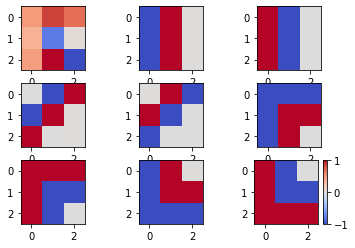

In [18]:
ccl1w = cust_conv_layer_1.get_weights()[0][:,:,0,:]
print("Sample weight after: \n{}".format(ccl1w[:,:,1]))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(ccl1w[:,:,i-1], cmap = "coolwarm")
plt.colorbar()
plt.show()

So from this test, we can see that on average the custom filters again decrease the time needed for convergence (assuming this network will eventually converge to 100\% train and validation accuracy). They also maintain their structure like in mini project 1. We can use these custom filters therefore to train on our previous image data from mini project 1, as well as try to describe transformations of said data.